In [1]:
import ROOT as RT
import numpy as np
from ROOT import TLatex
#RT.enableJSVis()

Welcome to JupyROOT 6.20/06


In [2]:
proof = RT.TProof.Open("lite://", "workers=12")

 +++ Starting PROOF-Lite with 12 workers +++
PROOF set to parallel mode (12 workers)


Opening connections to workers: OK (12 workers)                 
Setting up worker servers: OK (12 workers)                 


In [3]:
tree_mudata = RT.TChain('t')
tree_mudata.Add("/cms/routray/data_unblind10ifb_nodxyerrcut.root")
tree_muproofdata = RT.TProofChain(tree_mudata, True)

In [4]:
xfitdown = 8.5
xfitup = 11.0
binwidth = 0.01
bins = (xfitup - xfitdown)/binwidth
print "bins", bins

bins 250.0


Info in <TProofLite::SetQueryRunning>: starting query: 1
Info in <TProofQueryResult::SetRunning>: nwrks: 12
Looking up for exact location of files: OK (1 files)                 
Looking up for exact location of files: OK (1 files)                 
Info in <TPacketizer::TPacketizer>: Initial number of workers: 12
Validating files: OK (1 files)                 
[TProof::Progress] Total 11743343 events	|====================| 100.00 % [21626784.0 evts/s, 581.8 MB/s, time left: 0.0 s]
 Query processing time: 0.5 s
Info in <TProofDrawHist::SetDrawAtt>: att: 1000
Lite-0: all output objects have been merged                                                         
Info in <TCanvas::Print>: png file Upsilon.png has been created


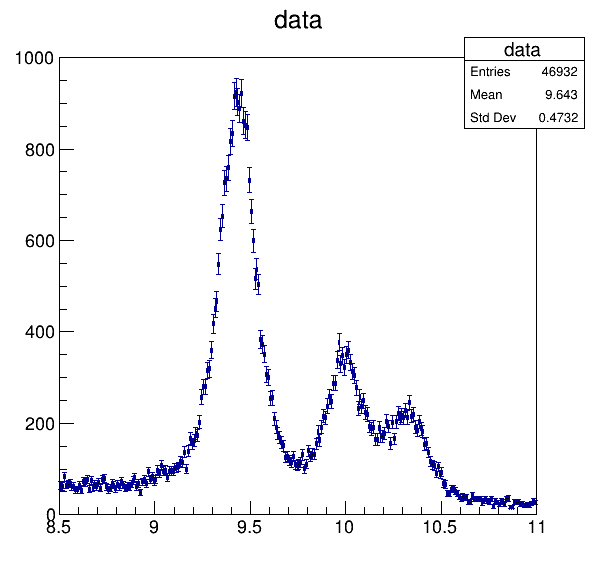

In [5]:
c1=RT.TCanvas('c1','c1',600,600)
data = RT.TH1F("data","data", int(bins), float(xfitdown), float(xfitup))
tree_muproofdata.Draw('dimuon_mass>>data',"dimuon_mass > {} && dimuon_mass < {}".format(xfitdown, xfitup),'')
data.Draw("E1")
c1.Draw()
c1.SaveAs("Upsilon.png")

In [6]:
x = RT.RooRealVar("x","x",float(xfitdown),float(xfitup))
l = RT.RooArgList(x)
data_obs = RT.RooDataHist("data_obs", "data_obs", l, data)

In [55]:
mean = RT.RooRealVar('mean', 'Mean of DoubleCB', 9.5,9.0,10.0)
sigma = RT.RooRealVar('sigma', 'Sigma of DoubleCB', 0, 1)
alpha_1 = RT.RooRealVar('alpha_1', 'alpha1 of DoubleCB',  1)
alpha_2 = RT.RooRealVar('alpha_2', 'alpha2 of DoubleCB',  4)
n_1 = RT.RooRealVar('n_1', 'n1 of DoubleCB', 2)
n_2 = RT.RooRealVar('n_2', 'n2 of DoubleCB', 5)

cbs_1 = RT.RooCBShape("CrystallBall_1", "CrystallBall_1", x, mean, sigma, alpha_1, n_1)
cbs_2 = RT.RooCBShape("CrystallBall_2", "CrystallBall_2", x, mean, sigma, alpha_2, n_2)
mc_frac = RT.RooRealVar('mc_frac', 'mc_frac', 0.45)

mean1 = RT.RooRealVar("mean1","Mean of Gaussian",9.5,9.0,10.0)
sigma1 = RT.RooRealVar("sigma1","Width of Gaussian",0.35)
gaus = RT.RooGaussian("gaus","gaus",x,mean1,sigma1)
mc_frac1 = RT.RooRealVar('mc_frac1', 'mc_frac1', 0.5)


signal0 = RT.RooAddPdf('signal0', 'signal0', RT.RooArgList(cbs_1,cbs_2,gaus), RT.RooArgList(mc_frac,mc_frac1))


mean_1 = RT.RooRealVar('mean_1', 'Mean of DoubleCB_1', 10.0,9.5,10.5)
sigma_1 = RT.RooRealVar('sigma_1', 'Sigma of DoubleCB_1', 0, 1)
alpha_11 = RT.RooRealVar('alpha_11', 'alpha1 of DoubleCB_1',  1)
alpha_21 = RT.RooRealVar('alpha_21', 'alpha2 of DoubleCB_1',  4)
n_11 = RT.RooRealVar('n_11', 'n1 of DoubleCB_1', 2)
n_21 = RT.RooRealVar('n_21', 'n2 of DoubleCB_1', 5)

cbs_11 = RT.RooCBShape("CrystallBall_11", "CrystallBall_11", x, mean_1, sigma_1, alpha_11, n_11)
cbs_21 = RT.RooCBShape("CrystallBall_21", "CrystallBall_21", x, mean_1, sigma_1, alpha_21, n_21)
mc_frac_1 = RT.RooRealVar('mc_frac_1', 'mc_frac_1', 0.45)

mean1_1 = RT.RooRealVar("mean1_1","Mean of Gaussian_1",10.0,9.5,10.5)
sigma1_1 = RT.RooRealVar("sigma1_1","Width of Gaussian_1",0.35)
gaus_1 = RT.RooGaussian("gaus_1","gaus_1",x,mean1,sigma1)
mc_frac1_1 = RT.RooRealVar('mc_frac1_1', 'mc_frac1_1', 0.5)

signal1 = RT.RooAddPdf('signal1', 'signal1', RT.RooArgList(cbs_11,cbs_21,gaus_1), RT.RooArgList(mc_frac_1,mc_frac1_1))


mean_2 = RT.RooRealVar('mean_2', 'Mean of DoubleCB_2', 10.25,10.1,10.4)
sigma_2 = RT.RooRealVar('sigma_2', 'Sigma of DoubleCB_2', 0, 1)
alpha_12 = RT.RooRealVar('alpha_12', 'alpha1 of DoubleCB_2',  1)
alpha_22 = RT.RooRealVar('alpha_22', 'alpha2 of DoubleCB_2',  4)
n_12 = RT.RooRealVar('n_12', 'n1 of DoubleCB_2', 2)
n_22 = RT.RooRealVar('n_22', 'n2 of DoubleCB_2', 5)

cbs_12 = RT.RooCBShape("CrystallBall_12", "CrystallBall_12", x, mean_2, sigma_2, alpha_12, n_12)
cbs_22 = RT.RooCBShape("CrystallBall_22", "CrystallBall_22", x, mean_2, sigma_2, alpha_22, n_22)
mc_frac_2 = RT.RooRealVar('mc_frac_2', 'mc_frac_2', 0.45)

mean1_2 = RT.RooRealVar("mean1_2","Mean of Gaussian_2",10.25,10.1,10.4)
sigma1_2 = RT.RooRealVar("sigma1_2","Width of Gaussian_2",0.05)
gaus_2 = RT.RooGaussian("gaus_2","gaus_2",x,mean1,sigma1)
mc_frac1_2 = RT.RooRealVar('mc_frac1_2', 'mc_frac1_2', 0.5)

signal2 = RT.RooAddPdf('signal2', 'signal2', RT.RooArgList(cbs_12,cbs_22,gaus_2), RT.RooArgList(mc_frac_2,mc_frac1_2))


signal0_frac = RT.RooRealVar('signal0_frac', 'signal0_frac', 0,1)
signal1_frac = RT.RooRealVar('signal1_frac', 'signal1_frac', 0,1)

signal = RT.RooAddPdf('signal', 'signal', RT.RooArgList(signal0,signal1,signal2), RT.RooArgList(signal0_frac,signal1_frac))

nS = 100000                                                                                                                                                                
sig_norm = RT.RooRealVar("sig_norm","sig_norm",nS,0,100000000*nS)    

In [77]:
order = 5
p = [0]*(order+1)
par = RT.RooArgList()
for i in range(order+1):
    p[i] = RT.RooRealVar("p{}".format(i),"p{}".format(i),-1,1000000000)
    par.add(p[i])
    background = RT.RooBernstein("background","background", x, par)
nB = data.Integral()
background_norm = RT.RooRealVar("background_norm","background_norm",nB,0.4*nB,1.5*nB)

In [78]:
model = RT.RooAddPdf("model","model",RT.RooArgList(signal,background),RT.RooArgList(sig_norm,background_norm))

In [79]:
RT.gErrorIgnoreLevel = RT.kWarning
RT.RooMsgService.instance().setGlobalKillBelow(RT.RooFit.ERROR)
RT.RooMsgService.instance().setSilentMode(True)

result = RT.RooFitResult(model.fitTo(data_obs, RT.RooFit.Save(RT.kTRUE), RT.RooFit.Minimizer("Minuit2","Migrad")))
model.fitTo(data_obs)

<ROOT.RooFitResult object at 0x(nil)>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


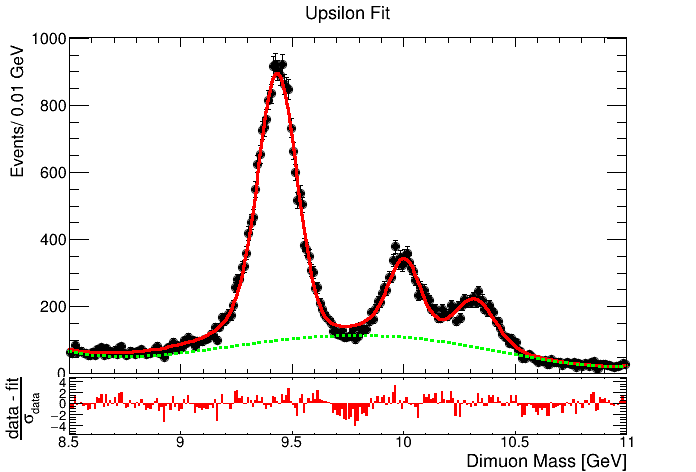

In [80]:
c2 = RT.TCanvas("c2","c2")

pad1 = RT.TPad("pad1", "The pad 80% of the height", 0.0, 0.2, 1.0, 1.0, 0)
pad2 = RT.TPad("pad2", "The pad 20% of the height", 0.0, 0.0, 1.0, 0.2, 0)
c2.cd()

pad1.Draw()
pad2.Draw()

pad1.cd()
pad1.SetTickx()
pad1.SetTicky()
pad1.SetBottomMargin(0.01)

xframe2 = x.frame(RT.RooFit.Title("Upsilon Fit"))
data_obs.plotOn(xframe2, RT.RooFit.Name("data"))
model.plotOn(xframe2,RT.RooFit.LineColor(2), RT.RooFit.Name("S+B"), RT.RooFit.LineStyle(1))
bkg_component = RT.RooArgSet(background)
model.plotOn(xframe2,RT.RooFit.LineColor(3), RT.RooFit.Components(bkg_component), RT.RooFit.Name("bkg"), RT.RooFit.LineStyle(2))
xframe2.Draw()
xframe2.GetYaxis().SetTitle("Events/ {} GeV".format(binwidth))
xframe2.GetYaxis().SetTitleSize(0.05)
xframe2.GetYaxis().SetLabelSize(0.045)
xframe2.GetYaxis().SetTitleOffset(0.95)
leg1 = RT.TLegend(0.6,0.0,0.9,0.3)
leg1.SetLineColor(0)
leg1.SetFillColor(0)
leg1.SetFillStyle(0)
leg1.AddEntry(xframe2.findObject("data"), "Data", "pe") 
leg1.AddEntry(xframe2.findObject("bkg"), "#color[2]{%s Fit}" %("Bernstein" + "_o" + "(" + str(order) + ")"), "l")
leg1.SetTextFont(42)
leg1.SetBorderSize(0)
# leg1.Draw()

pull = RT.RooHist(xframe2.pullHist("data","S+B"))
pull.SetFillColor(RT.kRed)
pull.SetLineWidth(0)

xframe3 = x.frame(RT.RooFit.Title(" "))

xframe3.addPlotable(pull,"B X")
xframe3.GetXaxis().SetLabelSize(0.17)
xframe3.GetYaxis().SetLabelSize(0.15)
xframe3.GetXaxis().SetTitleSize(0.21)
xframe3.GetYaxis().SetTitleSize(0.15)
xframe3.GetXaxis().SetTitleOffset(0.85)
xframe3.GetYaxis().SetTitleOffset(0.28)
xframe3.GetXaxis().SetTitle("Dimuon Mass [GeV]")
xframe3.GetYaxis().SetTitle("#scale[1.3]{#frac{data - fit}{#sigma_{data}}}")
# xframe3.GetYaxis().SetTitle("Pull")
xframe3.GetYaxis().SetLabelSize(0.15)


pad2.cd()
pad2.SetTickx()
pad2.SetTicky()
# pad2.SetGridy()     	
pad2.SetTopMargin(0.0)
pad2.SetBottomMargin(0.4)

xframe3.Draw()

# c2.BuildLegend()
c2.Draw()